# Pregled Plotting Funkcija u Seaborn-u

## Seminarski rad - SISJ

### Deo 2: Kompletna analiza plotting funkcija

---

## 1. Uvod u Seaborn plotting funkcije

Seaborn organizuje svoje plotting funkcije u nekoliko kategorija na osnovu tipa podataka i vrste vizualizacije. Razumevanje ove organizacije je ključno za efikasno korišćenje biblioteke.

### 1.1 Hijerarhija funkcija

Seaborn ima **dva glavna nivoa** plotting funkcija:

#### **Figure-level functions** (Funkcije na nivou figure)
- Kreiraju `FacetGrid` objekte
- Mogu da prikažu **više subplots**
- Automatski upravljaju figure i axes objektima
- Primeri: `relplot()`, `displot()`, `catplot()`

#### **Axes-level functions** (Funkcije na nivou axes)
- Rade sa **jednim axes objektom**
- Mogu se kombinovati sa matplotlib subplot funkcijama
- Omogućavaju detaljno kontrolisanje
- Primeri: `scatterplot()`, `lineplot()`, `histplot()`, `boxplot()`

### 1.2 Kategorije po tipu podataka

1. **Relational plots** - za prikazivanje odnosa između kontinuiranih varijabli
2. **Distribution plots** - za prikazivanje distribucije podataka
3. **Categorical plots** - za rad sa kategorijskim podacima
4. **Regression plots** - za regresijsku analizu
5. **Matrix plots** - za prikazivanje matrica podataka
6. **Multi-plot grids** - za složene multi-panel displeje


In [2]:
# Uvoz potrebnih biblioteka
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from scipy import stats

# Podešavanje stilova
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka za demonstraciju
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')
mpg = sns.load_dataset('mpg')

print("Podaci uspešno učitani!")
print(f"Tips dataset shape: {tips.shape}")
print(f"Iris dataset shape: {iris.shape}")
print(f"Flights dataset shape: {flights.shape}")
print(f"MPG dataset shape: {mpg.shape}")

# Kreiranje dodatnih podataka za neke primere
np.random.seed(42)
n = 100
synthetic_data = pd.DataFrame({
    'x': np.random.randn(n),
    'y': np.random.randn(n),
    'group': np.random.choice(['A', 'B', 'C'], n),
    'value': np.random.exponential(2, n)
})


Podaci uspešno učitani!
Tips dataset shape: (244, 7)
Iris dataset shape: (150, 5)
Flights dataset shape: (144, 3)
MPG dataset shape: (398, 9)


## 2. Relational Plots - Odnosi između varijabli

Relational plots se koriste za prikazivanje odnosa između **kontinuiranih varijabli**. Glavni predstavnici su scatter plot i line plot.

### 2.1 Teorijski uvod

**Scatter plot** je ideal za:
- Prikazivanje korelacije između dve varijable
- Identifikaciju outliers
- Grupisanje podataka po kategorijama

**Line plot** je ideal za:
- Prikazivanje trends kroz vreme
- Kontinuirane sekvence podataka
- Povezane tačke u logičkom redosledu

### 2.2 Hijerarhija funkcija:

- **Figure-level**: `relplot()` - univerzalna funkcija
- **Axes-level**: `scatterplot()`, `lineplot()` - specifične funkcije


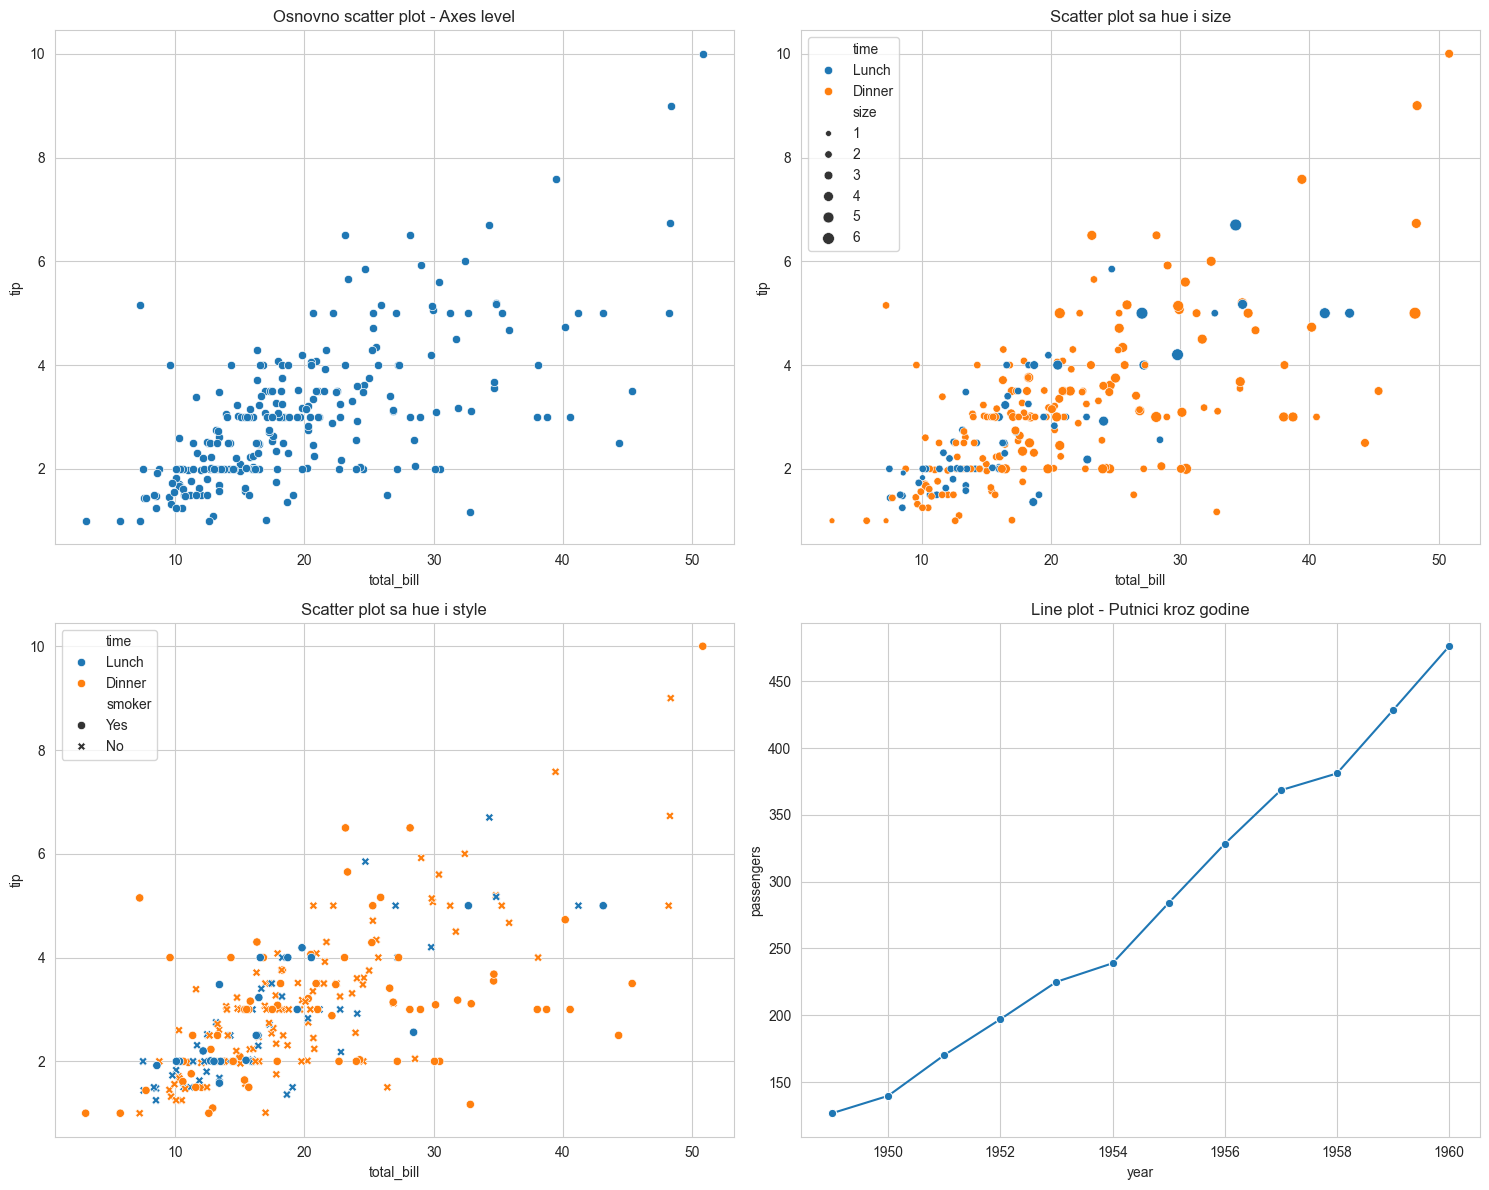


KORELACIJA između total_bill i tip: 0.676
Interpretacija: Postoji umerena pozitivna korelacija između računa i napojnice
Što je veći račun, to je veća napojnica - što je logično!


In [3]:
# 2.3 Praktični primeri - Relational Plots

# Primer 1: Osnovno scatter plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Axes-level scatterplot
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Osnovno scatter plot - Axes level')

# Figure-level scatterplot (relplot)
# Kreiramo novi subplot za figure-level funkciju
plt.subplot(2, 2, 2)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', size='size')
plt.title('Scatter plot sa hue i size')

# Scatter plot sa stilom
plt.subplot(2, 2, 3)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='smoker')
plt.title('Scatter plot sa hue i style')

# Line plot za time series
plt.subplot(2, 2, 4)
# Agregiramo flights podatke po godini
flights_agg = flights.groupby('year')['passengers'].mean().reset_index()
sns.lineplot(data=flights_agg, x='year', y='passengers', marker='o')
plt.title('Line plot - Putnici kroz godine')

plt.tight_layout()
plt.show()

# Analiza korelacije u tips datasets
correlation = tips[['total_bill', 'tip']].corr().iloc[0, 1]
print(f"\nKORELACIJA između total_bill i tip: {correlation:.3f}")
print("Interpretacija: Postoji umerena pozitivna korelacija između računa i napojnice")
print("Što je veći račun, to je veća napojnica - što je logično!")


## 3. Distribution Plots - Distribucije podataka

Distribution plots se koriste za prikazivanje **distribucije jedne ili više varijabli**. Omogućavaju nam da razumemo oblik, centralnu tendenciju i raspršenost podataka.

### 3.1 Teorijski uvod

**Histogram** prikazuje:
- Frekvenciju pojavljivanja vrednosti
- Oblik distribucije (normalna, skewed, bimodalna...)
- Outliers i anomalije

**Density plot (KDE)** prikazuje:
- Estimaciju verovatnoće distribution
- Glatku aproksimaciju histograma
- Bolje za poređenje distribucija

**Box plot** prikazuje:
- Kvartile i medijanu
- Outliers kao tačke
- Kompaktni prikaz osnovnih statistika

### 3.2 Hijerarhija funkcija:

- **Figure-level**: `displot()` - univerzalna funkcija
- **Axes-level**: `histplot()`, `kdeplot()`, `boxplot()`, `violinplot()` - specifične funkcije


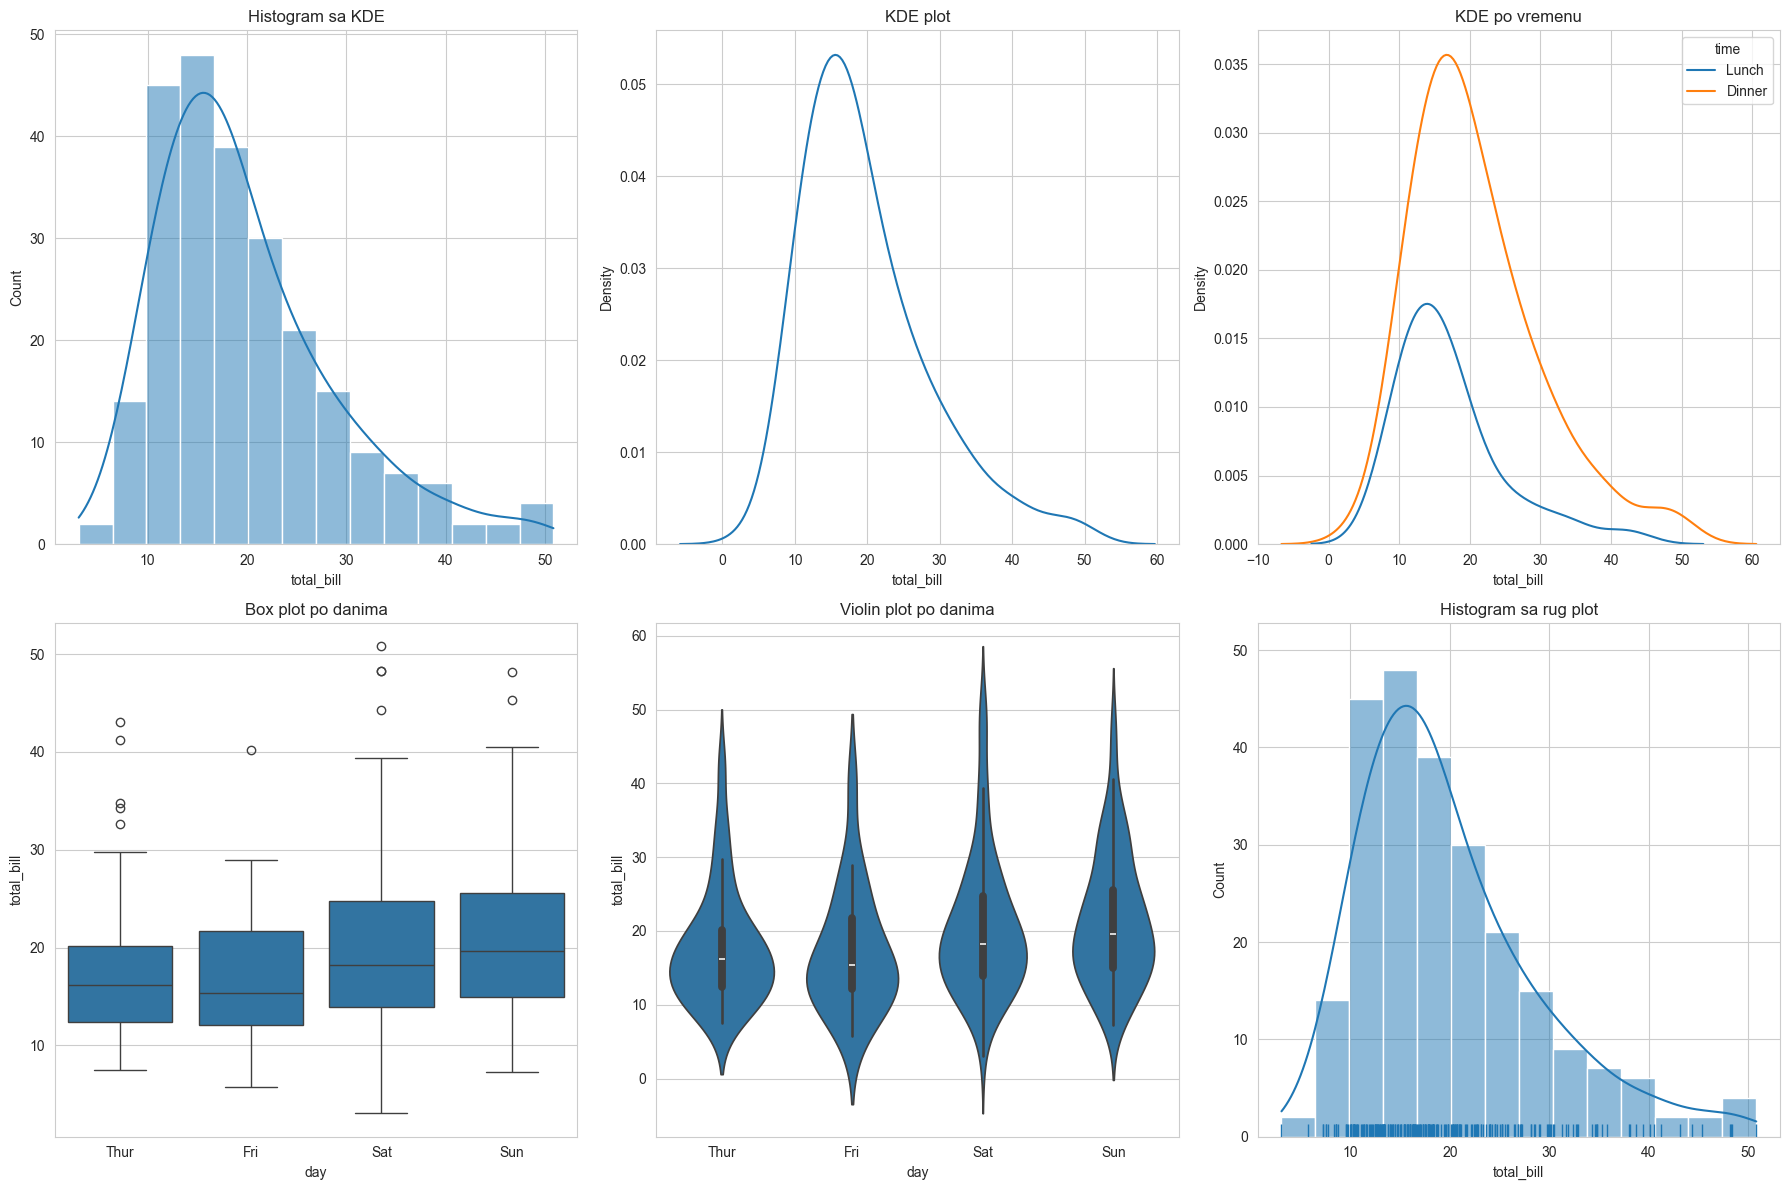

STATISTIČKA ANALIZA DISTRIBUCIJE RAČUNA:
Srednja vrednost: 19.79
Medijana: 17.80
Standardna devijacija: 8.90
Skewness: 1.13
Kurtosis: 1.22
\nDistribucija je POZITIVNO skewed (rep se proteže udesno)


In [4]:
# 3.3 Praktični primeri - Distribution Plots

# Primer 1: Različiti tipovi distribucijskih grafika
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogram
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0,0])
axes[0,0].set_title('Histogram sa KDE')

# Samo KDE
sns.kdeplot(data=tips, x='total_bill', ax=axes[0,1])
axes[0,1].set_title('KDE plot')

# Multiple KDE za poređenje
sns.kdeplot(data=tips, x='total_bill', hue='time', ax=axes[0,2])
axes[0,2].set_title('KDE po vremenu')

# Box plot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Box plot po danima')

# Violin plot
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1,1])
axes[1,1].set_title('Violin plot po danima')

# Distribucija sa rug plot
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[1,2])
sns.rugplot(data=tips, x='total_bill', ax=axes[1,2])
axes[1,2].set_title('Histogram sa rug plot')

plt.tight_layout()
plt.show()

# Statistička analiza distribucije
print("STATISTIČKA ANALIZA DISTRIBUCIJE RAČUNA:")
print(f"Srednja vrednost: {tips['total_bill'].mean():.2f}")
print(f"Medijana: {tips['total_bill'].median():.2f}")
print(f"Standardna devijacija: {tips['total_bill'].std():.2f}")
print(f"Skewness: {tips['total_bill'].skew():.2f}")
print(f"Kurtosis: {tips['total_bill'].kurtosis():.2f}")

# Interpretacija skewness
skewness = tips['total_bill'].skew()
if skewness > 0:
    print(f"\\nDistribucija je POZITIVNO skewed (rep se proteže udesno)")
elif skewness < 0:
    print(f"\\nDistribucija je NEGATIVNO skewed (rep se proteže ulevo)")
else:
    print(f"\\nDistribucija je SIMETRIČNA")


## 4. Categorical Plots - Kategorijski podaci

Categorical plots se koriste kada imamo **kategorijsku varijablu** na jednoj osi i **kontinuiranu varijablu** na drugoj osi. Omogućavaju nam da poredimo vrednosti između različitih kategorija.

### 4.1 Teorijski uvod

**Bar plot** prikazuje:
- Prosečne vrednosti po kategorijama
- Confidence intervals
- Ideal za poređenje srednjih vrednosti

**Count plot** prikazuje:
- Frekvenciju pojavljivanja kategorija
- Distribuciju kategorijskih varijabli
- Kao histogram za kategorijske podatke

**Point plot** prikazuje:
- Tačkaste ocene sa confidence intervals
- Trend između kategorija
- Bolje za prikazivanje promena

### 4.2 Hijerarhija funkcija:

- **Figure-level**: `catplot()` - univerzalna funkcija
- **Axes-level**: `barplot()`, `countplot()`, `pointplot()`, `stripplot()`, `swarmplot()` - specifične funkcije


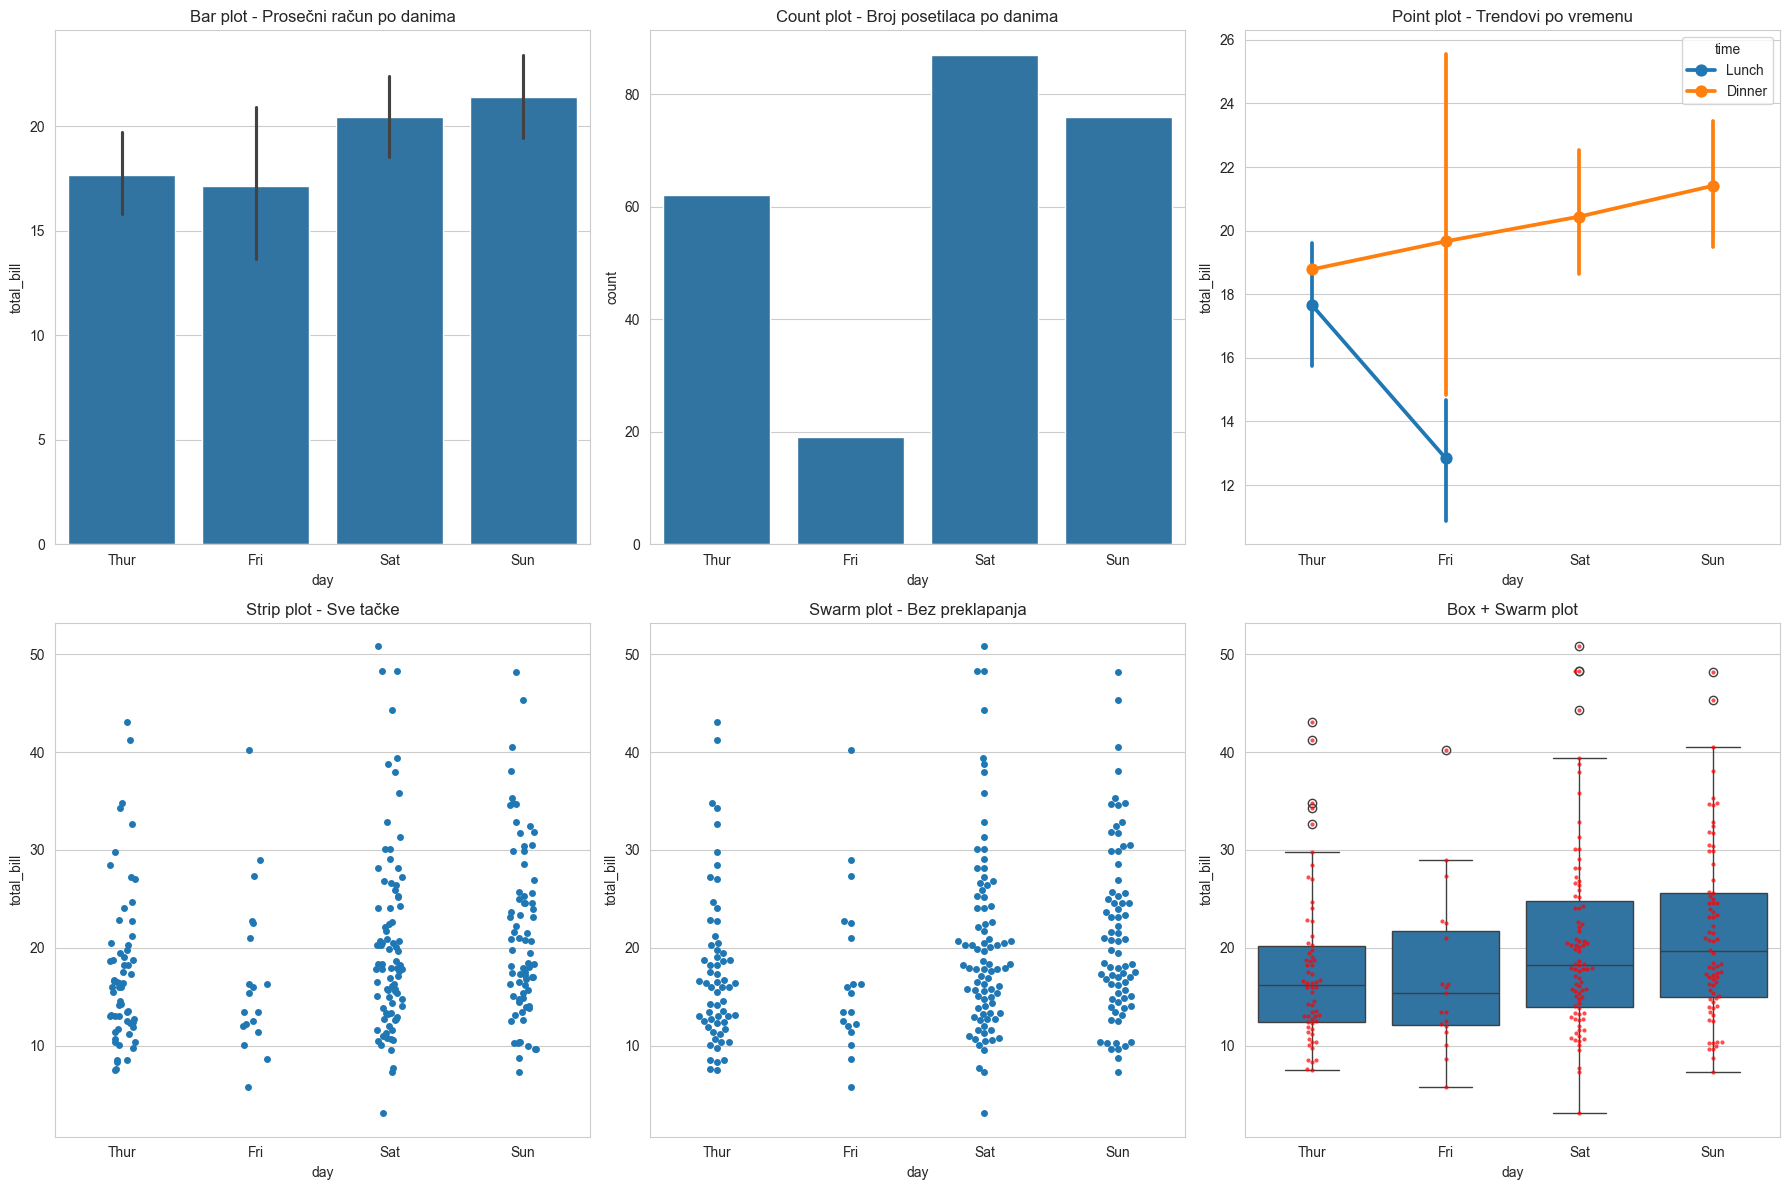

ANALIZA RAČUNA PO DANIMA:
           mean  median       std  count
day                                     
Thur  17.682742   16.20  7.886170     62
Fri   17.151579   15.38  8.302660     19
Sat   20.441379   18.24  9.480419     87
Sun   21.410000   19.63  8.832122     76
\nNajveći prosečan račun: Sun (21.41$)
\nANOVA test za razliku između dana:
F-statistika: 2.767
P-vrednost: 0.042
Postoji statistički značajna razlika između dana!


In [5]:
# 4.3 Praktični primeri - Categorical Plots

# Primer 1: Različiti tipovi kategorijskih grafika
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar plot - prosečne vrednosti
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0,0])
axes[0,0].set_title('Bar plot - Prosečni račun po danima')

# Count plot - frekvencija
sns.countplot(data=tips, x='day', ax=axes[0,1])
axes[0,1].set_title('Count plot - Broj posetilaca po danima')

# Point plot - trendovi
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', ax=axes[0,2])
axes[0,2].set_title('Point plot - Trendovi po vremenu')

# Strip plot - sve tačke
sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Strip plot - Sve tačke')

# Swarm plot - bez preklapanja
sns.swarmplot(data=tips, x='day', y='total_bill', ax=axes[1,1])
axes[1,1].set_title('Swarm plot - Bez preklapanja')

# Kombinacija box + swarm
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1,2])
sns.swarmplot(data=tips, x='day', y='total_bill', ax=axes[1,2], 
              color='red', alpha=0.7, size=3)
axes[1,2].set_title('Box + Swarm plot')

plt.tight_layout()
plt.show()

# Statistička analiza po kategorijama
print("ANALIZA RAČUNA PO DANIMA:")
daily_stats = tips.groupby('day')['total_bill'].agg(['mean', 'median', 'std', 'count'])
print(daily_stats)

# Pronalaženje najrentabilnijeg dana
best_day = daily_stats['mean'].idxmax()
best_avg = daily_stats['mean'].max()
print(f"\\nNajveći prosečan račun: {best_day} ({best_avg:.2f}$)")

# Testiranje statističke značajnosti
from scipy.stats import f_oneway
groups = [tips[tips['day'] == day]['total_bill'] for day in tips['day'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"\\nANOVA test za razliku između dana:")
print(f"F-statistika: {f_stat:.3f}")
print(f"P-vrednost: {p_value:.3f}")
if p_value < 0.05:
    print("Postoji statistički značajna razlika između dana!")
else:
    print("Nema statistički značajne razlike između dana.")


## 5. Regression Plots - Regresijska analiza

Regression plots kombinuju scatter plot sa regresijskim linijama, omogućavajući vizualizaciju **linearnih i nelinearnih odnosa** između varijabli.

### 5.1 Teorijski uvod

**Regresijska linija** prikazuje:
- Trend u podacima
- Pravac najbolje aproksimacije
- Confidence intervals oko linije

**Residual plot** prikazuje:
- Greške modela
- Heteroskedasticnost
- Nelinearnosti koje model ne pokriva

### 5.2 Dostupne funkcije:

- `regplot()` - osnovna regresijska linija
- `residplot()` - residual plot
- `lmplot()` - napredni regression plot sa faceting


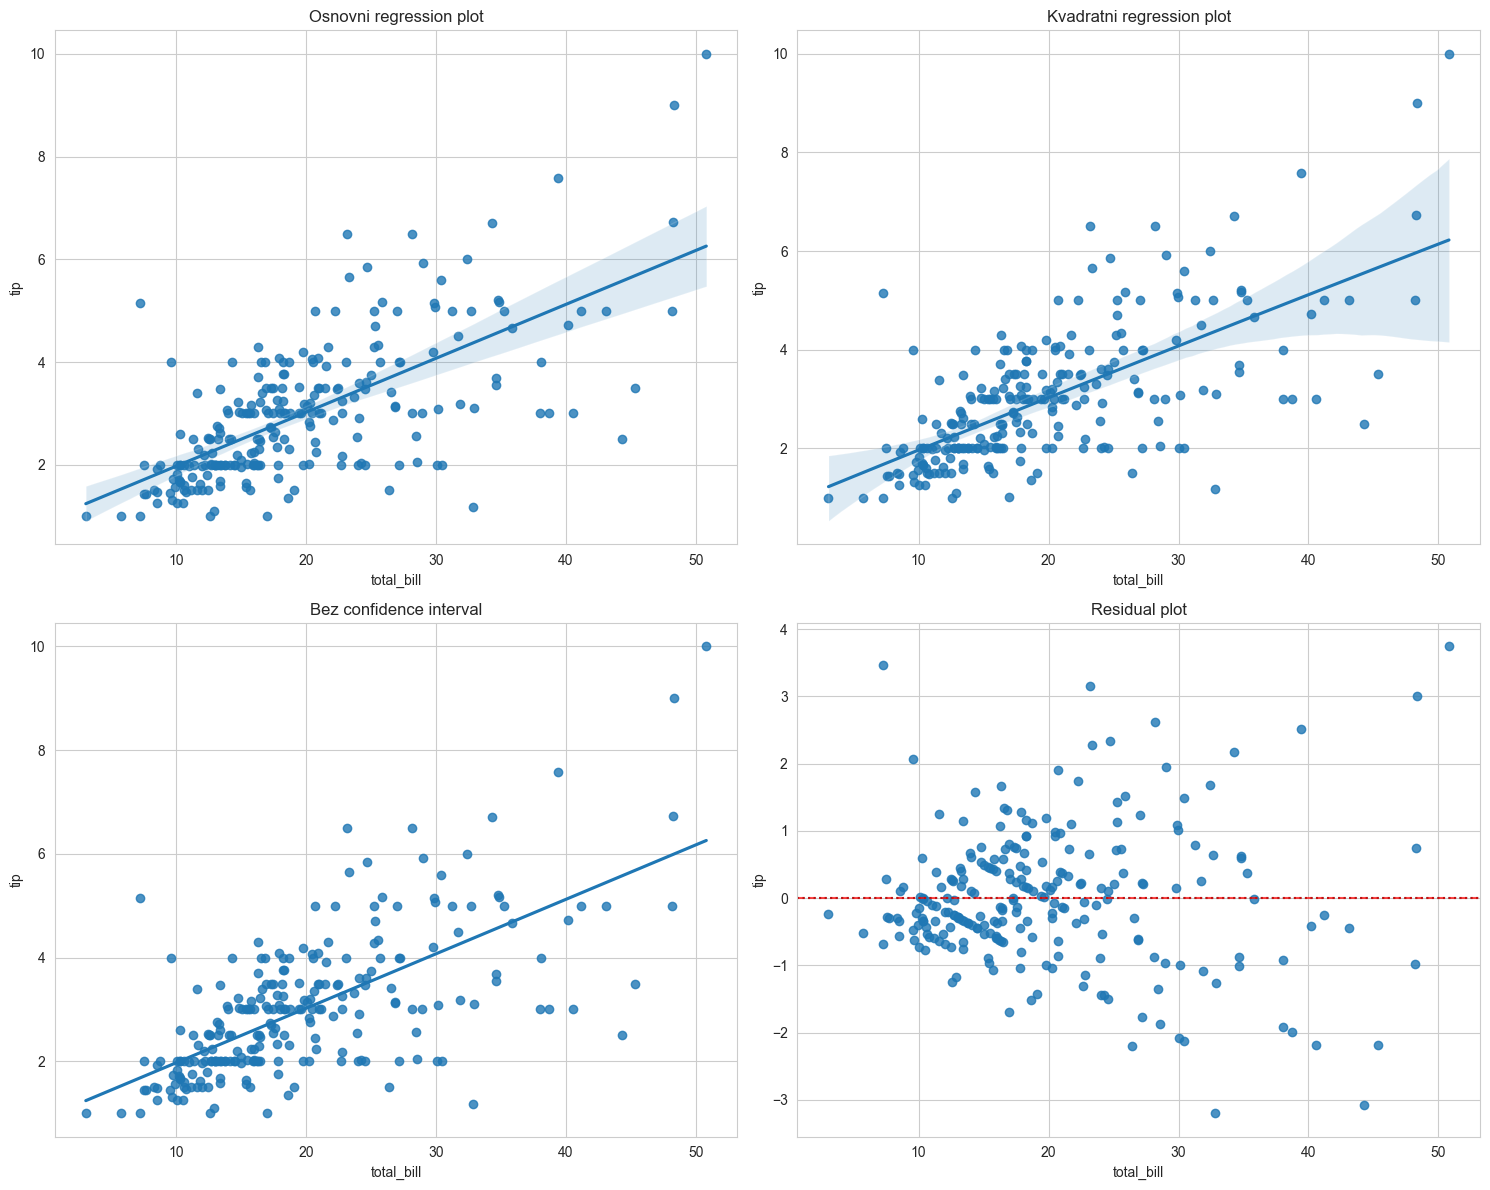

REGRESIJSKA ANALIZA:
Koeficijent korelacije (r): 0.676
Koeficijent determinacije (r²): 0.457
Slope (nagib): 0.105
Intercept (odsečak): 0.920
P-vrednost: 6.692e-34
Standardna greška: 0.007
\nINTERPRETACIJA:
Za svaki dolar povećanja računa, napojnica se povećava za 0.11$
Model objašnjava 45.7% varijanse u napojnicama
\nZa račun od 25.0$, predviđena napojnica: 3.55$


In [6]:
# 5.3 Praktični primeri - Regression Plots

# Primer 1: Različiti tipovi regresijskih grafika
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Osnovni regplot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0,0])
axes[0,0].set_title('Osnovni regression plot')

# Regplot sa drugim redom
sns.regplot(data=tips, x='total_bill', y='tip', order=2, ax=axes[0,1])
axes[0,1].set_title('Kvadratni regression plot')

# Regplot bez confidence interval
sns.regplot(data=tips, x='total_bill', y='tip', ci=None, ax=axes[1,0])
axes[1,0].set_title('Bez confidence interval')

# Residual plot
sns.residplot(data=tips, x='total_bill', y='tip', ax=axes[1,1])
axes[1,1].set_title('Residual plot')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Statistička analiza regresije
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(tips['total_bill'], tips['tip'])

print("REGRESIJSKA ANALIZA:")
print(f"Koeficijent korelacije (r): {r_value:.3f}")
print(f"Koeficijent determinacije (r²): {r_value**2:.3f}")
print(f"Slope (nagib): {slope:.3f}")
print(f"Intercept (odsečak): {intercept:.3f}")
print(f"P-vrednost: {p_value:.3e}")
print(f"Standardna greška: {std_err:.3f}")

print(f"\\nINTERPRETACIJA:")
print(f"Za svaki dolar povećanja računa, napojnica se povećava za {slope:.2f}$")
print(f"Model objašnjava {r_value**2*100:.1f}% varijanse u napojnicama")

# Predviđanje
test_bill = 25.0
predicted_tip = slope * test_bill + intercept
print(f"\\nZa račun od {test_bill}$, predviđena napojnica: {predicted_tip:.2f}$")


## 6. Matrix Plots - Matrice podataka

Matrix plots se koriste za vizualizaciju **2D matrica podataka** gde boja predstavlja vrednost. Najpopularniji su heatmap-ovi koji prikazuju korelacije ili druge matricne podatke.

### 6.1 Teorijski uvod

**Heatmap** prikazuje:
- Korelacije između varijabli
- Confusion matrices u ML
- Bilo koje matricne podatke
- Patterns u tabelarnim podacima

**Clustermap** prikazuje:
- Hijerarhijsko grupisanje
- Dendrograme
- Reorganizovane matrice na osnovu sličnosti

### 6.2 Dostupne funkcije:

- `heatmap()` - osnovna heatmap
- `clustermap()` - heatmap sa clustering


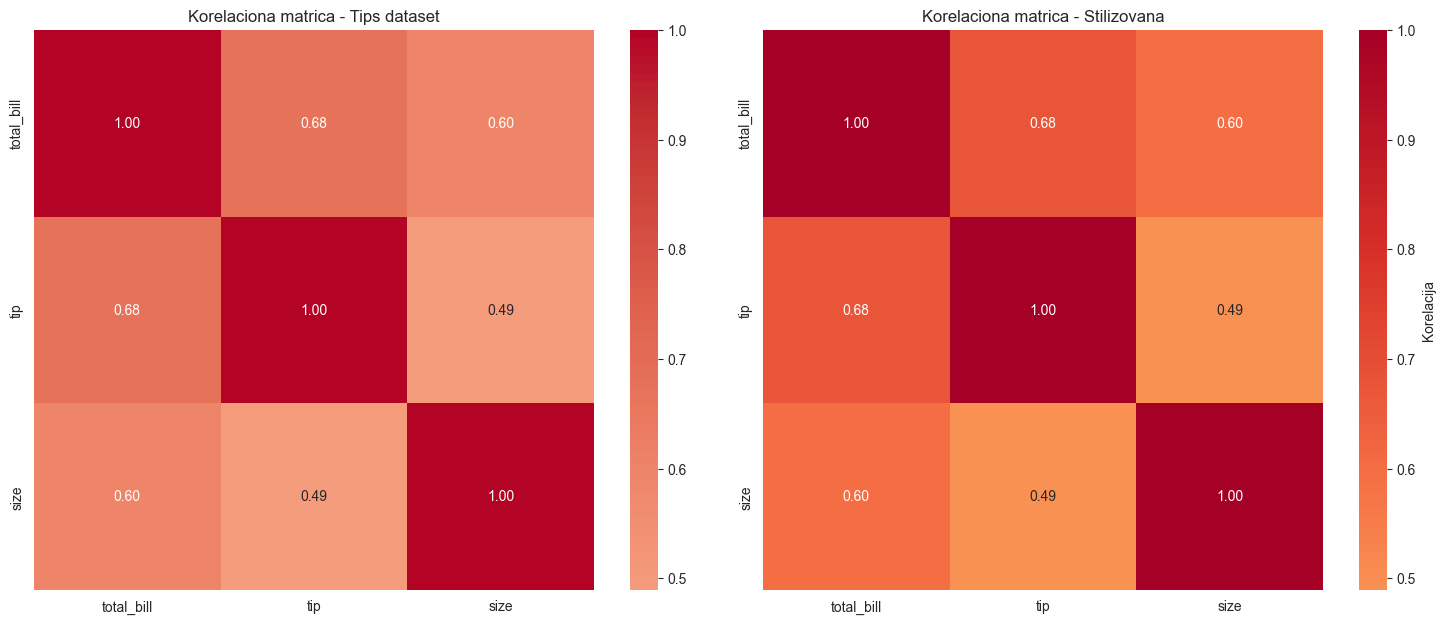

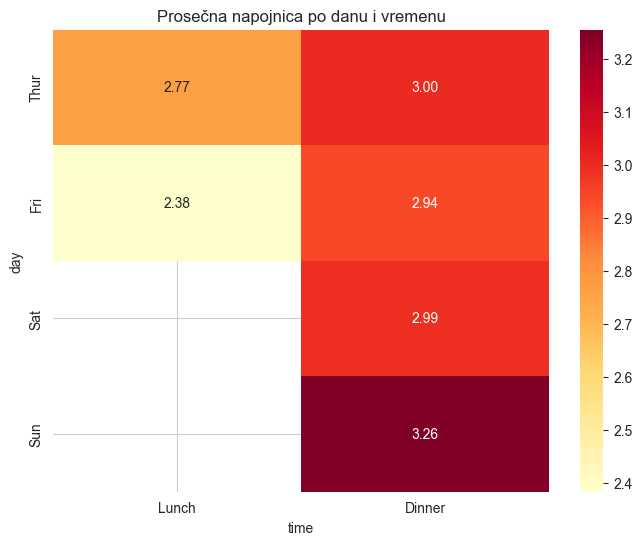

RuntimeError: clustermap requires scipy to be available

<Figure size 1000x800 with 0 Axes>

In [ ]:
# 6.3 Praktični primeri - Matrix Plots

# Primer 1: Heatmap korelacione matrice
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Korelaciona matrica za numeričke kolone
numeric_columns = tips.select_dtypes(include=[np.number]).columns
correlation_matrix = tips[numeric_columns].corr()

# Osnovna heatmap
sns.heatmap(correlation_matrix, ax=axes[0], cmap='coolwarm', center=0, 
            square=True, annot=True, fmt='.2f')
axes[0].set_title('Korelaciona matrica - Tips dataset')

# Heatmap sa više opcija
sns.heatmap(correlation_matrix, ax=axes[1], cmap='RdYlBu_r', center=0, 
            square=True, annot=True, fmt='.2f', cbar_kws={'label': 'Korelacija'})
axes[1].set_title('Korelaciona matrica - Stilizovana')

plt.tight_layout()
plt.show()

# Primer 2: Pivot table heatmap
pivot_table = tips.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Prosečna napojnica po danu i vremenu')
plt.show()

# Primer 3: Clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', center=0, 
               square=True, annot=True, fmt='.2f')
plt.title('Clustermap korelacione matrice')
plt.show()

# Analiza korelacija
print("ANALIZA KORELACIJA:")
print("\\nNajjače pozitivne korelacije:")
# Kreiranje flattened verzije matrice
correlations = correlation_matrix.unstack().sort_values(ascending=False)
# Uklanjanje dijagonale (self-correlation)
correlations = correlations[correlations < 1.0]
print(correlations.head(3))

print("\\nNajjače negativne korelacije:")
print(correlations.tail(3))

# Interpretacija
strongest_corr = correlations.iloc[0]
var1, var2 = correlations.index[0]
print(f"\\nNajjača korelacija: {var1} i {var2} ({strongest_corr:.3f})")
print("Ova korelacija je očekivana - što je veći račun, veća je i napojnica!")


## 7. Pregled svih funkcija i kada ih koristiti

### 7.1 Sažetak po kategorijama:

| **Kategorija** | **Figure-level** | **Axes-level** | **Kada koristiti** |
|----------------|------------------|----------------|-------------------|
| **Relational** | `relplot()` | `scatterplot()`, `lineplot()` | Odnosi između kontinuiranih varijabli |
| **Distribution** | `displot()` | `histplot()`, `kdeplot()`, `boxplot()` | Distribucije podataka |
| **Categorical** | `catplot()` | `barplot()`, `countplot()`, `pointplot()` | Kategorijski podaci |
| **Regression** | `lmplot()` | `regplot()`, `residplot()` | Regresijska analiza |
| **Matrix** | - | `heatmap()`, `clustermap()` | Matrice podataka |

### 7.2 Kada koristiti Figure-level vs Axes-level:

**Figure-level functions:**
- Kada trebate **multiple subplots** (faceting)
- Kada trebate **automatsko upravljanje** layoutom
- Kada radite sa **velikim brojem kategorija**

**Axes-level functions:**
- Kada trebate **preciznu kontrolu** nad pojedinačnim plot-om
- Kada **kombinujete sa matplotlib** subplot funkcijama
- Kada kreirate **custom layouts**

### 7.3 Glavne prednosti seaborn plotting funkcija:

1. **Jednostavnost** - manje koda za kompleksne grafike
2. **Konzistentnost** - isti API kroz različite tipove grafika
3. **Statistička orijentacija** - ugrađene statističke funkcije
4. **Estetska superiornost** - lepši default izgled
5. **Pandas integracija** - prirodna podrška za DataFrame

---

## 8. Zaključak

U ovom notebook-u smo detaljno prošli kroz sve glavne kategorije plotting funkcija u seaborn-u:

### Što smo naučili:
- **Hijerarhiju** funkcija (figure-level vs axes-level)
- **Relational plots** za odnose između varijabli
- **Distribution plots** za analizu distribucija
- **Categorical plots** za kategorijske podatke
- **Regression plots** za regresijsku analizu
- **Matrix plots** za matrice podataka

### Ključne preporuke:
1. **Počnite sa figure-level** funkcijama za brze rezultate
2. **Koristite axes-level** za detaljnu kontrolu
3. **Kombinirajte različite tipove** plotova za bolju analizu
4. **Uvek dodajte kontekst** i interpretaciju rezultata

### Sledeći koraci:
U narednom notebook-u ćemo istražiti **strukture podataka** koje seaborn može da prihvati i kako ih optimalno pripremiti za vizualizaciju.

---

**Napomena**: Ovaj notebook pokriva osnovne plotting funkcije. Za napredne tehnike i customizacije, proučite naredne notebook-ove.
